<a href="https://colab.research.google.com/github/abood-W/ai_python/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [189]:
import numpy as np
import pandas as pd
import matplotlib. pyplot as plt
import tensorflow as tf
from sklearn.impute import SimpleImputer

In [190]:
df = pd.read_csv('/content/imports-85.data', header=None)

In [191]:
column_names = [
    "symboling", "normalized_losses", "make", "fuel_type", "aspiration",
    "num_doors", "body_style", "drive_wheels", "engine_location", "wheel_base",
    "length", "width", "height", "curb_weight", "engine_type", "num_cylinders",
    "engine_size", "fuel_system", "bore", "stroke", "compression_ratio",
    "horsepower", "peak_rpm", "city_mpg", "highway_mpg", "price"
]
df.columns = column_names

#cleaning process
df.drop_duplicates()
df = df.drop(['peak_rpm' ,'peak_rpm','engine_location','symboling','num_doors','fuel_system','compression_ratio'] , axis=1)
print(df.columns)
print(df)

Index(['normalized_losses', 'make', 'fuel_type', 'aspiration', 'body_style',
       'drive_wheels', 'wheel_base', 'length', 'width', 'height',
       'curb_weight', 'engine_type', 'num_cylinders', 'engine_size', 'bore',
       'stroke', 'horsepower', 'city_mpg', 'highway_mpg', 'price'],
      dtype='object')
    normalized_losses         make fuel_type aspiration   body_style  \
0                   ?  alfa-romero       gas        std  convertible   
1                   ?  alfa-romero       gas        std  convertible   
2                   ?  alfa-romero       gas        std    hatchback   
3                 164         audi       gas        std        sedan   
4                 164         audi       gas        std        sedan   
..                ...          ...       ...        ...          ...   
200                95        volvo       gas        std        sedan   
201                95        volvo       gas      turbo        sedan   
202                95        volvo       g

In [192]:
df.replace("?", np.nan, inplace=True)
num_cols = ["normalized_losses", "bore", "stroke", "horsepower", "price"]
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

imputer = SimpleImputer(strategy='mean')
df[num_cols] = imputer.fit_transform(df[num_cols])
df


,normalized_losses,make,fuel_type,aspiration,body_style,drive_wheels,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,bore,stroke,horsepower,city_mpg,highway_mpg,price
0,122.0,alfa-romero,gas,std,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,111.0,21,27,13495.0
1,122.0,alfa-romero,gas,std,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,111.0,21,27,16500.0
2,122.0,alfa-romero,gas,std,hatchback,rwd,94.5,171.2,65.5,52.4,2823,ohcv,six,152,2.68,3.47,154.0,19,26,16500.0
3,164.0,audi,gas,std,sedan,fwd,99.8,176.6,66.2,54.3,2337,ohc,four,109,3.19,3.40,102.0,24,30,13950.0
4,164.0,audi,gas,std,sedan,4wd,99.4,176.6,66.4,54.3,2824,ohc,five,136,3.19,3.40,115.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95.0,volvo,gas,std,sedan,rwd,109.1,188.8,68.9,55.5,2952,ohc,four,141,3.78,3.15,114.0,23,28,16845.0
201,95.0,volvo,gas,turbo,sedan,rwd,109.1,188.8,68.8,55.5,3049,ohc,four,141,3.78,3.15,160.0,19,25,19045.0
202,95.0,volvo,gas,std,sedan,rwd,109.1,188.8,68.9,55.5,3012,ohcv,six,173,3.58,2.87,134.0,18,23,21485.0
203,95.0,volvo,diesel,turbo,sedan,rwd,109.1,188.8,68.9,55.5,3217,ohc,six,145,3.01,3.40,106.0,26,27,22470.0


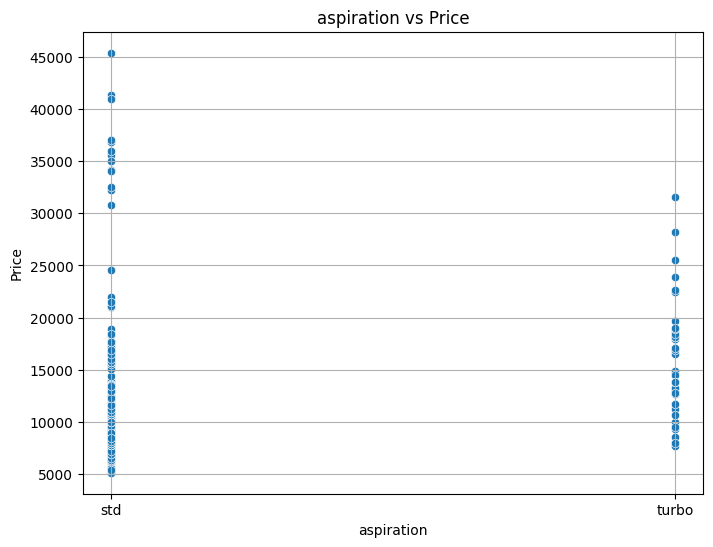

In [193]:
  import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(x=df['aspiration'], y=df['price'])
plt.title("aspiration vs Price")
plt.xlabel("aspiration")
plt.ylabel("Price")
plt.grid(True)
plt.show()

In [194]:
df_encoded = pd.get_dummies(df, drop_first=True) #  احول القيم النصية الى رقمية
X = df_encoded.drop("price", axis=1).values
y = df_encoded[["price"]].values

In [195]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [196]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [197]:
df.shape

(205, 20)

In [198]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [199]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [200]:
model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.2)

Epoch 1/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 220702048.0000 - val_loss: 293297536.0000
Epoch 2/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 210082352.0000 - val_loss: 293261056.0000
Epoch 3/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 213739136.0000 - val_loss: 293216512.0000
Epoch 4/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 215828032.0000 - val_loss: 293156928.0000
Epoch 5/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 221894304.0000 - val_loss: 293075456.0000
Epoch 6/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 225847808.0000 - val_loss: 292966528.0000
Epoch 7/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 199158416.0000 - val_loss: 292823936.0000
Epoch 8/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 235611120.0000 - val_loss: 292632160.0000
Epoch 9/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 222868032.0000 - val_loss: 292377280.0000
Epoch 10/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 196359520.0000 - val_loss: 292038880.0000

In [201]:
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 8328111.5000
Test Loss: 8053008.5


In [202]:
import numpy as np

rmse = np.sqrt(loss)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 2837.78


In [203]:
print("avg price", df["price"].mean())
print("Loss percentage: ",(rmse/df["price"].mean())*100)


avg price 13207.129353233831
Loss percentage:  21.48674586928295


In [204]:
prediction = model.predict(X_test)

print(prediction[:5])

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
[[29739.678]
 [19668.404]
 [ 5879.191]
 [15188.969]
 [26466.24 ]]


In [205]:
mean_price = np.mean(df['price'])
print(mean_price)

print(df)

13207.129353233831
     normalized_losses         make fuel_type aspiration   body_style  \
0                122.0  alfa-romero       gas        std  convertible   
1                122.0  alfa-romero       gas        std  convertible   
2                122.0  alfa-romero       gas        std    hatchback   
3                164.0         audi       gas        std        sedan   
4                164.0         audi       gas        std        sedan   
..                 ...          ...       ...        ...          ...   
200               95.0        volvo       gas        std        sedan   
201               95.0        volvo       gas      turbo        sedan   
202               95.0        volvo       gas        std        sedan   
203               95.0        volvo    diesel      turbo        sedan   
204               95.0        volvo       gas      turbo        sedan   

    drive_wheels  wheel_base  length  width  height  curb_weight engine_type  \
0            rwd        